# Job 3
<b>Number of accidents and average number of lethal accidents per week per borough </b>

After the required imports, let's read the dataset.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

ds = pd.read_csv("NYPD_Motor_Vehicle_CollisionsPROC.csv")

Let's compute firstly the week-year attribute of each record, and then the week-year@borough, and insert them into the dataframe. Since the dataset is incomplete, we need to drop all the rows where there is no information about the borough, being unusable.

In [2]:
week_borough = []
weeks = []

for index, row in ds.iterrows():    
    borough = date = row.iloc[2]
    if(pd.isnull(borough)):
        week_borough.append(borough)
    else:
        date = row.iloc[0]
        day = date.split('/')[1]
        month = date.split('/')[0]
        year = date.split('/')[2]
        dt = datetime.date(int(year), int(month), int(day)) 
        wk = dt.isocalendar()[1]
        
        if(int(month)==1 and (wk==53 or wk==52)):
            newyear = int(year)-1
            year=str(newyear)
    
        if(int(month)==12 and wk==1):
            newyear = int(year)+1
            year=str(newyear)
    

        wb = year+'-'+str(wk)+' @'+str(borough)
        wy = year+'-'+str(wk)
        week_borough.append(wb)
        weeks.append(wy)

ds['WEEKBOROUGH']=week_borough

ds = ds.dropna(subset=['WEEKBOROUGH'])

ds['WEEKYEAR']=weeks
ds.head(5)

DATE   TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  03/12/2016  14:10  MANHATTAN   10013.0  40.725673 -74.005780   
1  03/13/2016  18:30  MANHATTAN   10007.0  40.715237 -74.013379   
2  03/14/2016  10:50  MANHATTAN   10038.0  40.706408 -74.004559   
4  03/14/2016  14:30  MANHATTAN   10005.0  40.704470 -74.006290   
6  03/14/2016  10:30  MANHATTAN   10013.0  40.724276 -74.011354   

                  LOCATION ON STREET NAME CROSS STREET NAME  OFF STREET NAME  \
0   (40.725673, -74.00578)  VARICK STREET     SPRING STREET              NaN   
1  (40.715237, -74.013379)    WEST STREET     MURRAY STREET              NaN   
2  (40.706408, -74.004559)    JOHN STREET      FRONT STREET              NaN   
4    (40.70447, -74.00629)            NaN               NaN  120 WALL STREET   
6  (40.724276, -74.011354)    WEST STREET      WATTS STREET              NaN   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
4                          0                         0   
6                          0                         0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
4                              0                             0   
6                              0                             0   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
4                          0                         0   
6                          0                         0   

   NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
4                           0                          0   
6                           0                          0   

    CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2  \
0                     Unspecified                     Unspecified   
1  Driver Inattention/Distraction  Driver Inattention/Distraction   
2              Lost Consciousness              Lost Consciousness   
4                             NaN                             NaN   
6                     Unspecified                     Unspecified   

  CONTRIBUTING FACTOR VEHICLE 3 CONTRIBUTING FACTOR VEHICLE 4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
4                           NaN                           NaN   
6                           NaN                           NaN   

  CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY VEHICLE TYPE CODE 1  \
0                           NaN     3405175   PASSENGER VEHICLE   
1                           NaN     3405176   PASSENGER VEHICLE   
2                           NaN     3405177   PASSENGER VEHICLE   
4                           NaN     3405179   PASSENGER VEHICLE   
6                           NaN     3405181   PASSENGER VEHICLE   

      VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
0       PASSENGER VEHICLE                 NaN                 NaN   
1       PASSENGER VEHICLE                 NaN                 NaN   
2  SMALL COM VEH(4 TIRES)                 NaN                 NaN   
4       PASSENGER VEHICLE                 NaN                 NaN   
6       PASSENGER VEHICLE                 NaN                 NaN   

  VEHICLE TYPE CODE 5         WEEKBOROUGH WEE

As first analisys we calculate, for each week and borough, the number of total and lethal accidents, and put them in a separate dataframe.

In [3]:
wb_set = ds['WEEKBOROUGH'].unique()
wbdf = pd.DataFrame(index = wb_set)
wbdf['SUM']=np.zeros(len(wbdf.index))
wbdf['COUNT']=np.zeros(len(wbdf.index))

for k in wbdf.index:
    tempds = ds[ds['WEEKBOROUGH'] == k]
    summ = tempds['NUMBER OF PERSONS KILLED'].astype('bool').sum()
    count = len(tempds.index)
    wbdf.loc[k]['SUM'] = summ
    wbdf.loc[k]['COUNT'] = count

wbdf.head(10)

SUM  COUNT
2016-10 @MANHATTAN  0.0  793.0
2016-11 @MANHATTAN  2.0  771.0
2014-30 @QUEENS     3.0  768.0
2016-12 @MANHATTAN  2.0  701.0
2016-9 @MANHATTAN   1.0  809.0
2016-13 @MANHATTAN  0.0  881.0
2016-14 @MANHATTAN  0.0  844.0
2016-15 @MANHATTAN  0.0  828.0
2016-16 @MANHATTAN  0.0  875.0
2016-17 @MANHATTAN  0.0  693.0

Let's now aggregate the result in another dataset, reporting, for each borough, the percentage of lethal accidents over the total ones.

In [4]:
b_set = ds['BOROUGH'].unique()
bdf = pd.DataFrame(index = b_set)
bdf['WEEKLY_AVG']=np.zeros(len(bdf.index))

for k in bdf.index:
    tempds = ds[ds['BOROUGH'] == k]
    summ = tempds['NUMBER OF PERSONS KILLED'].astype('bool').sum()
    n_weeks = len(ds['WEEKYEAR'].unique())
    bdf.loc[k]['WEEKLY_AVG'] = float(summ)/n_weeks

bdf.head(10)

WEEKLY_AVG
MANHATTAN        0.628692
QUEENS           0.915612
BRONX            0.468354
BROOKLYN         1.092827
STATEN ISLAND    0.185654

Let's now do some visualization: we want to plot the trend of the accidents, troughout the different years and in the 5 NYC boroughs. Let's calculate for each year and borough the number of (lethal) accidents. And finally we plot the histogram representing all the information.

In [5]:
b_accidents = []
b_lethals = []
years = np.array([2012,2013,2014,2015,2016,2017])
for b in b_set:
    df_borough = wbdf[wbdf.index.str.contains(b)]
    for y in years:
        df_borough_year = df_borough[df_borough.index.str.contains(str(y))]
        acc = df_borough_year['COUNT'].sum()
        let_acc = df_borough_year['SUM'].sum()
        b_accidents.append((acc))
        b_lethals.append((let_acc))
    
print b_accidents
print b_lethals

[20633.0, 41472.0, 41170.0, 42980.0, 36462.0, 107.0, 19038.0, 39213.0, 40907.0, 43031.0, 41219.0, 183.0, 9450.0, 19712.0, 19664.0, 21505.0, 21527.0, 75.0, 23176.0, 46896.0, 47638.0, 51462.0, 47285.0, 157.0, 4875.0, 8297.0, 6602.0, 6402.0, 6691.0, 21.0]
[21.0, 39.0, 34.0, 23.0, 32.0, 0.0, 24.0, 65.0, 49.0, 48.0, 31.0, 0.0, 17.0, 32.0, 19.0, 25.0, 18.0, 0.0, 31.0, 63.0, 67.0, 67.0, 30.0, 1.0, 10.0, 4.0, 10.0, 11.0, 9.0, 0.0]


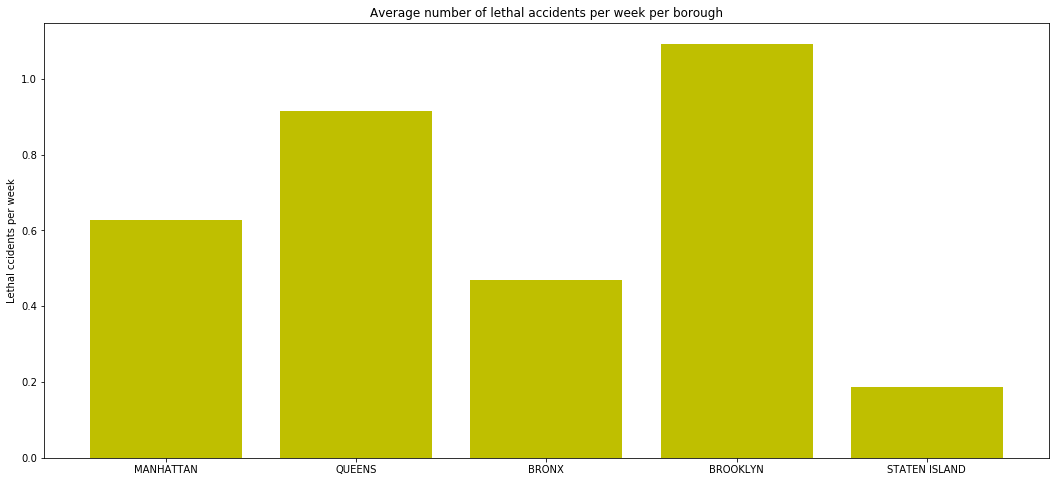

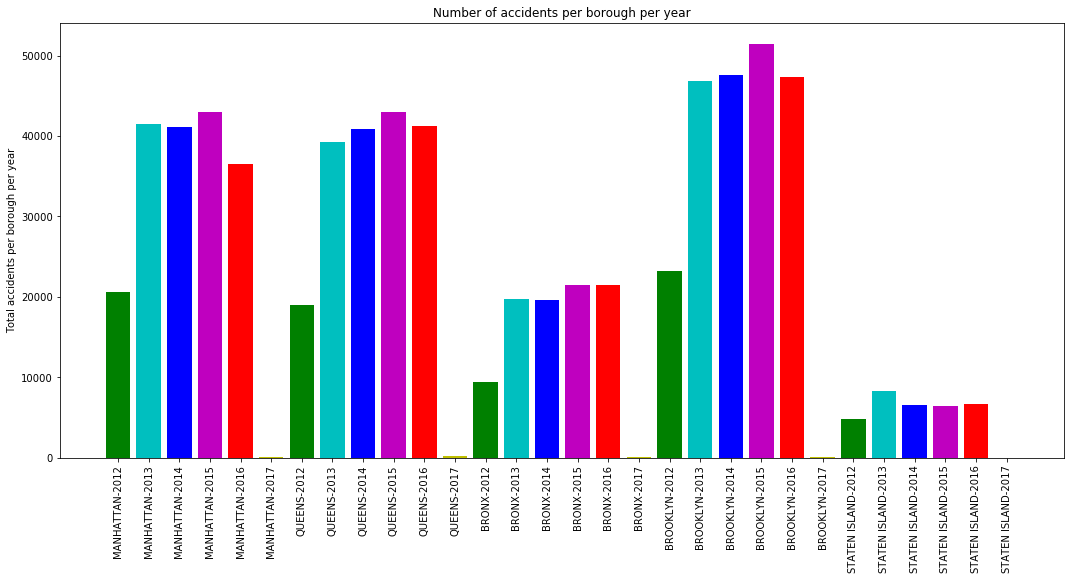

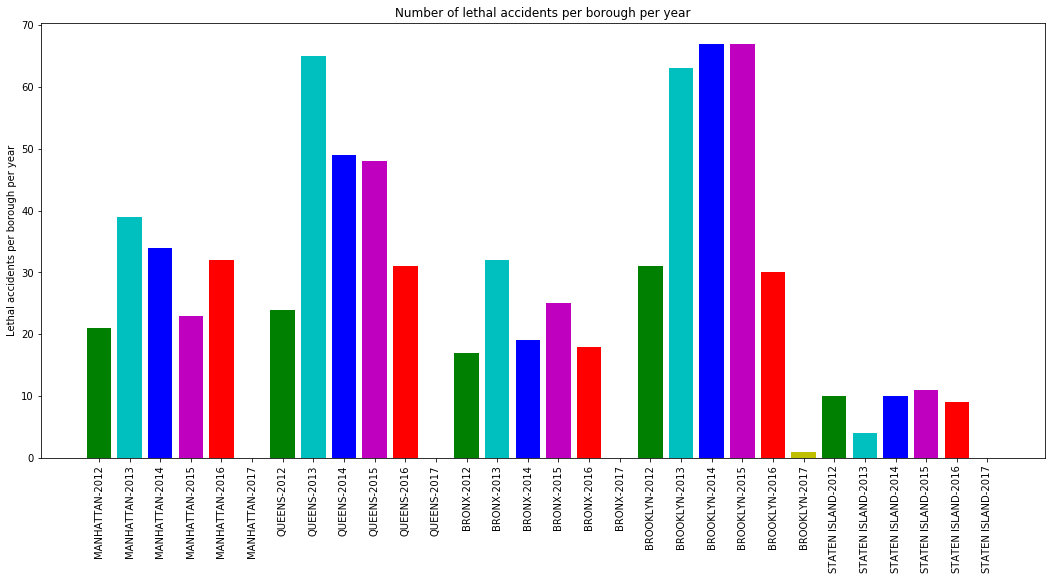

In [6]:
X1 = np.arange(len(b_set))
X2 = np.arange(len(years)*len(b_set))
Y1 = b_accidents
Y2 = b_lethals

colors = ['g','c','b','m','r','y']

ticks = []
for b in b_set:
    for y in years:
        ticks.append(b+'-'+str(y))
        
ticks = np.array(ticks)

plt.figure(0, figsize=(18,8))
plt.ylabel('Lethal ccidents per week')
plt.title('Average number of lethal accidents per week per borough')
plt.xticks(X1, b_set)
plt.bar(X1, bdf['WEEKLY_AVG'], color='y')

plt.figure(1, figsize=(18,8))
plt.ylabel('Total accidents per borough per year')
plt.title('Number of accidents per borough per year')
plt.xticks(X2, ticks, rotation='vertical')

plt.bar(X2, Y1, color=colors)

plt.figure(2, figsize=(18,8))
plt.ylabel('Lethal accidents per borough per year')
plt.title('Number of lethal accidents per borough per year')
plt.xticks(X2, ticks, rotation='vertical')
plt.bar(X2, Y2, color=colors)

plt.show()

<b>With such results we can say that <u>Brooklyin</u> is the most dangerous borough, and also the most lethal; Queens and Manhattan follow back. This can be understood since these three boroughs should be also the most busy ones, being residential, working and turistic boroughs. We can also see that between 2015 and 2016 the number of accidents, both lethal and non-lethal, have decreased in these three zones, while in the other two, Staten Island and Bronx have remained the same. Very remarkable is the halving of lethal accidents at Brooklyn, neverthless the total ones remained the same.</b>

In [ ]:
writer = pd.ExcelWriter('outj3.xlsx')
wbdf.to_excel(writer,'Sheet1')
bdf.to_excel(writer,'Sheet2')
writer.save()